# Recomendador de inversiones inmoviliarias

## Datos origen:

- [indicadores](datasets/gem_indicadores.csv)
- [pisos](datasets/idealista_datafile.csv)


## Tareas:

1. Asignar precio estadístico de alquiler y compraventa a cada inmueble basado en su barrio o distrito
1. Crear una puntuación para el precio de compra para cada inmueble de 0 a 1 en función del precio estadístico de compra de cada barrio o distrito
1. Crear una puntuación para el precio de alquiler para cada inmueble de 0 a 1 en función del precio estadístico de alquiler de cada barrio o distrito
1. Calcular la tasa de retorno de cada inmueble en función del precio de compra y el precio de alquiler
1. Crear una puntuación final para cada inmueble de 0 a 1 en función de las puntuaciones anteriores


In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings('ignore')

pisos = pd.read_csv('datasets/realties.csv')
indicadores = pd.read_csv('datasets/gen_indicadores.csv')

# convertir los campos price y price_old a enteros, interpretando el punto como separador de miles
pisos[['price','price_old','rooms','surface']] = (pisos[['price','price_old','rooms','surface']].fillna(-1)).astype(int).replace(-1, np.nan)


display(pisos.info())
display(indicadores.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created      445 non-null    object 
 1   link         445 non-null    object 
 2   type_v       445 non-null    object 
 3   address      445 non-null    object 
 4   town         445 non-null    object 
 5   price        445 non-null    int64  
 6   rooms        390 non-null    float64
 7   surface      443 non-null    float64
 8   price_old    22 non-null     float64
 9   info         445 non-null    object 
 10  description  445 non-null    object 
 11  tags         18 non-null     object 
 12  agent        150 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 45.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             84 non-null     int64  
 1   nombre                         84 non-null     object 
 2   sup_id                         84 non-null     int64  
 3   sup_nombre                     84 non-null     object 
 4   tipo                           84 non-null     object 
 5   precio_venta_1y                84 non-null     int64  
 6   superficie_venta_1y            84 non-null     int64  
 7   elasticidad_1y                 84 non-null     float64
 8   precio_alquiler_1y             84 non-null     int64  
 9   rentabilidad_1y                84 non-null     float64
 10  grow_acu_alquiler_1y           84 non-null     float64
 11  grow_acu_venta_1y              84 non-null     float64
 12  grow_acu_superficie_venta_1y   84 non-null     float

None

In [2]:
from src.report.realty_report import RealtyReport   

pisos['town'] = pisos['town'].map(RealtyReport.get_town)
pisos['description'] = pisos['description'].map(RealtyReport.clean_description)
pisos[['type_v','address', 'description']] = pisos[['type_v','address', 'description']].applymap(RealtyReport.estandarizar)

pisos



,created,link,type_v,address,town,price,rooms,surface,price_old,info,description,tags,agent
0,2025-01-18 19:41:43,https://www.idealista.com/inmueble/107051200/,piso,"calle de les carretes, el raval, barcelona",el raval,57700,2.0,49.0,NaN,"['2 hab.', '49 m²', 'Planta 1ª sin ascensor']",piso de segunda mano situado en la ciudad de b...,NaN,NaN
1,2025-01-18 19:41:43,https://www.idealista.com/inmueble/106870904/,piso,"calle de perafita, ciutat meridiana torre bar...",ciutat meridiana torre baro vallbona,64000,3.0,60.0,NaN,"['3 hab.', '60 m²', ' sin ascensor']",vivienda ubicada en la barriada de sant andres...,NaN,NaN
2,2025-01-18 19:41:43,https://www.idealista.com/inmueble/107049368/,duplex,"calle de picalquers, 9, el raval, barcelona",el raval,99000,1.0,36.0,NaN,"['1 hab.', '36 m²', 'Bajo exterior sin ascensor']","***local adaptado a vivienda, se vende como lo...",NaN,NaN
3,2025-01-18 19:41:43,https://www.idealista.com/inmueble/107042622/,piso,"calle de romani, les roquetes, barcelona",les roquetes,95000,1.0,28.0,NaN,"['1 hab.', '28 m²', 'Entreplanta sin ascensor']","se vende estudio en la calle romani, en nou ba...",NaN,NaN
4,2025-01-18 19:41:43,https://www.idealista.com/inmueble/107040924/,estudio,"calle de romani, les roquetes, barcelona",les roquetes,95000,NaN,31.0,NaN,"['31 m²', 'Entreplanta sin ascensor']",¿deseas convertir la casa de tus suenos en una...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2025-01-18 19:47:52,https://www.fotocasa.es/es/comprar/vivienda/ba...,flat,la marina del port,sants montjuu00efc,86000,1.0,29.0,NaN,"['cabinets: 2', 'terrace: 10', 'community_zone...",inmueble ilegalmente okupadornrnrnsituado en l...,NaN,https://www.fotocasa.es/es/inmobiliaria-inveri...
441,2025-01-18 19:47:52,https://www.fotocasa.es/es/comprar/vivienda/ba...,flat,el raval,ciutat vella,100000,3.0,33.0,NaN,"['antiquity: 9', 'bathrooms: 1', 'conservation...",reserva ahora esta vivienda de 33 mu00b2.nncli...,NaN,https://www.fotocasa.es/es/inmobiliaria-clikal...
442,2025-01-18 19:47:52,https://www.fotocasa.es/es/comprar/vivienda/ba...,flat,vallcarca i els penitents,gru00e0cia,18000,1.0,53.0,NaN,"['heating: 3', 'parking: 5', 'private_garden: ...","es un apartamento vacacional ,en reguimen comp...",NaN,https://www.fotocasa.es/es/comprar/inmuebles/e...
443,2025-01-18 19:47:52,https://www.fotocasa.es/es/comprar/vivienda/ba...,flat,vilapicina i la torre llobeta,nou barris,83000,1.0,45.0,NaN,"['terrace: 10', 'furnished: 19', 'equiped_kitc...",dolu00e7a llar nou barris te presenta este aco...,NaN,https://www.fotocasa.es/es/inmobiliaria-dolca-...


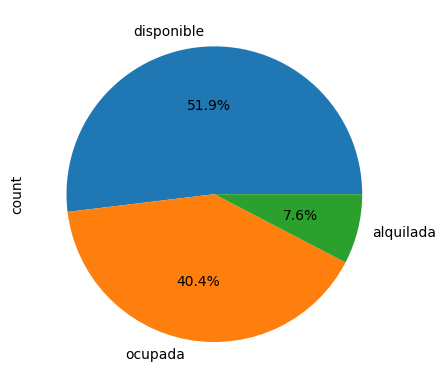

    disponibilidad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [3]:
pisos['disponibilidad'] = pisos['description'].map(RealtyReport.get_occupation)


pisos['disponibilidad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()
print(pisos[pisos['disponibilidad'] == 'disponible'][['disponibilidad','description']].to_string())


In [4]:

# Initialize tags column if it doesn't exist
pisos['tags'] = pisos['tags'].fillna('')
pisos['tags'] = pisos['description'].map(RealtyReport.extract_tags)

display(pisos[['description', 'tags']])


,description,tags
0,piso de segunda mano situado en la ciudad de b...,[]
1,vivienda ubicada en la barriada de sant andres...,[]
2,"***local adaptado a vivienda, se vende como lo...","[local, estudio]"
3,"se vende estudio en la calle romani, en nou ba...","[estudio, terraza]"
4,¿deseas convertir la casa de tus suenos en una...,[oportunidad]
...,...,...
440,inmueble ilegalmente okupadornrnrnsituado en l...,[]
441,reserva ahora esta vivienda de 33 mu00b2.nncli...,[metro]
442,"es un apartamento vacacional ,en reguimen comp...",[]
443,dolu00e7a llar nou barris te presenta este aco...,"[estudio, terraza]"


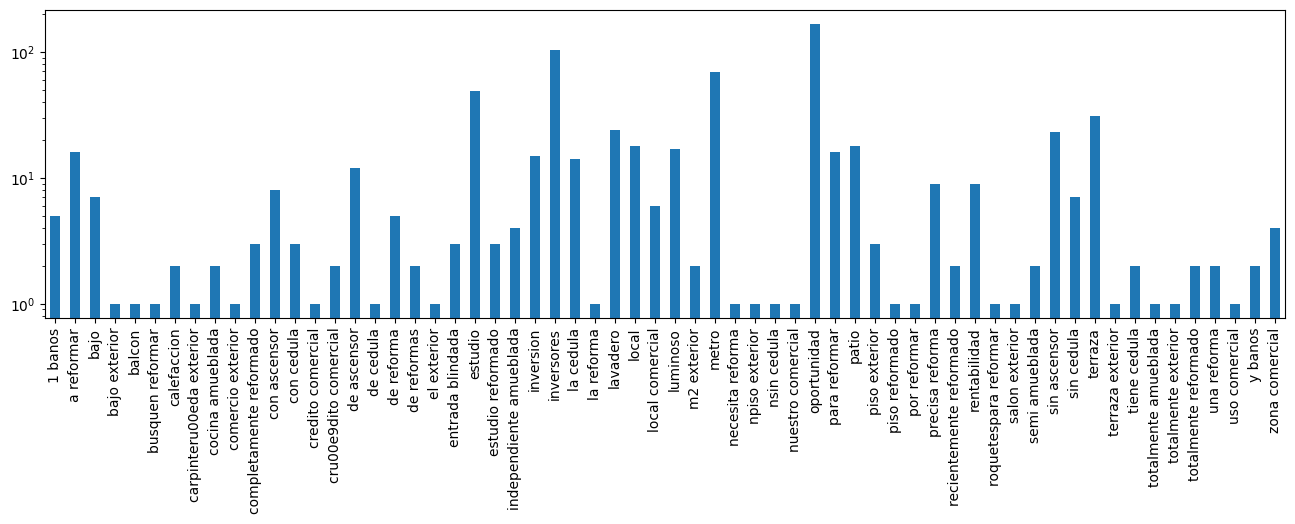

In [5]:

# Split tags into individual words and count occurrences
tag_counts = pd.Series([word.strip() for tags_list in pisos['tags'] for word in tags_list if word.strip()]).value_counts()
# Plot the tag counts
tag_counts.sort_index().plot(kind='bar', figsize=(16,4), logy=True)
plt.show()


In [6]:

places = indicadores['nombre'].unique().tolist()

pisos[['barrio', 'barrio_ratio']] = pd.DataFrame(pisos['town'].map(lambda x: RealtyReport.map_place(x, places)[:2]).tolist(), index=pisos.index)
display(pisos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created         445 non-null    object 
 1   link            445 non-null    object 
 2   type_v          445 non-null    object 
 3   address         445 non-null    object 
 4   town            445 non-null    object 
 5   price           445 non-null    int64  
 6   rooms           390 non-null    float64
 7   surface         443 non-null    float64
 8   price_old       22 non-null     float64
 9   info            445 non-null    object 
 10  description     445 non-null    object 
 11  tags            445 non-null    object 
 12  agent           150 non-null    object 
 13  disponibilidad  445 non-null    object 
 14  barrio          445 non-null    object 
 15  barrio_ratio    445 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 55.8+ KB


None

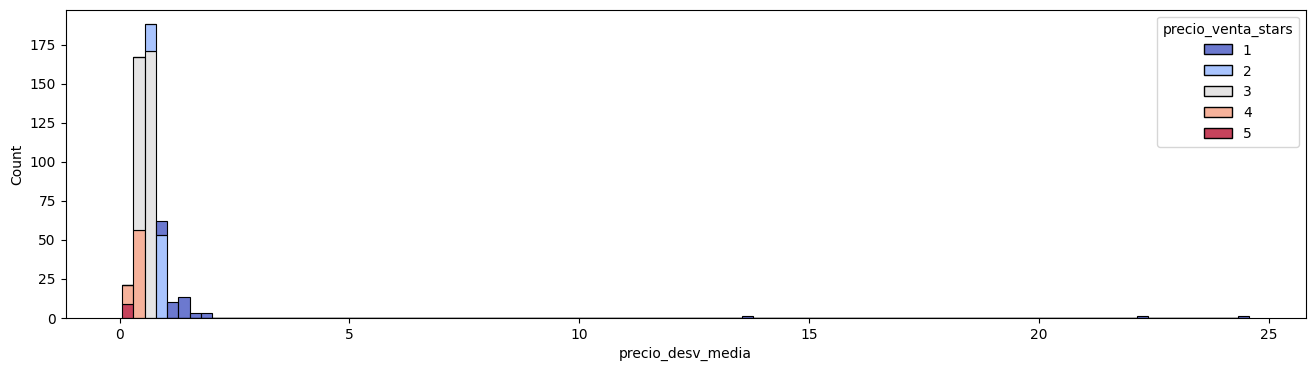

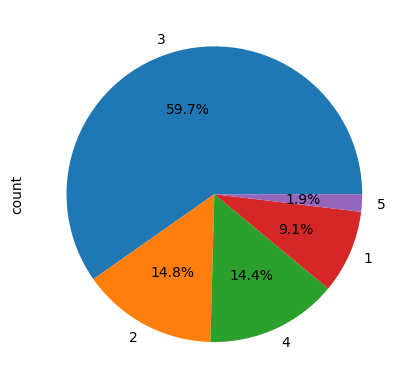

In [7]:
informe = pd.merge(pisos, indicadores, left_on='barrio', right_on='nombre', how='left')

# calcular el precio por metro cuadrado 
informe['precio_m2'] = informe.apply(lambda row: RealtyReport.get_price_m2(row['price'], row['surface']), axis=1)

# calcular la desviación de precio_m2 sobre precio_venta_1y (medio del último año)
informe['precio_desv_media'] = informe.apply(lambda row: RealtyReport.get_price_desv_media(row['precio_m2'], row['precio_venta_1y']), axis=1)

# calcular la puntuación del precio de compra, máximo 5 stars, sobre el precio medio de venta del último (precio_venta_1y) 
informe['precio_venta_stars'] = informe.apply(lambda row: RealtyReport.get_price_stars(row['precio_desv_media']), axis=1)



plt.figure(figsize=(16,4))
sns.histplot(data=informe, x='precio_desv_media', bins=100, hue='precio_venta_stars', palette='coolwarm', multiple='stack')
plt.show()


# [(informe['precio_venta_stars'].fillna(0) > 2) & (informe['precio_venta_stars'].fillna(0) < 3)]
informe[['price', 'surface', 'precio_m2', 'precio_venta_1y','precio_desv_media', 'precio_venta_stars']].sort_values(by='precio_desv_media', ascending=False)

informe['precio_venta_stars'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


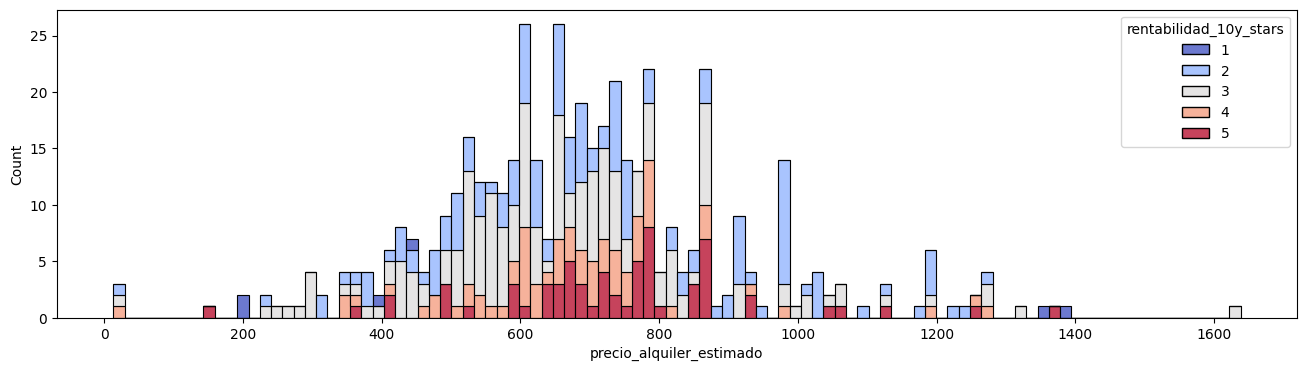

In [8]:
# display(informe.info())

informe['precio_alquiler_estimado'] = informe.apply(lambda row: RealtyReport.get_price_alquiler_estimado(row['precio_alquiler_1y'], row['surface']), axis=1)
informe['precio_venta_estimado'] = informe.apply(lambda row: RealtyReport.get_price_venta_estimado(row['precio_venta_1y'], row['surface']), axis=1)

plt.figure(figsize=(16,4))
sns.histplot(data=informe[informe['surface'] <150], x='precio_alquiler_estimado', bins=100, palette='coolwarm', hue='rentabilidad_10y_stars' , multiple='stack')
plt.show()


# display(informe[informe['surface'] >150].sort_values(by='surface', ascending=False))

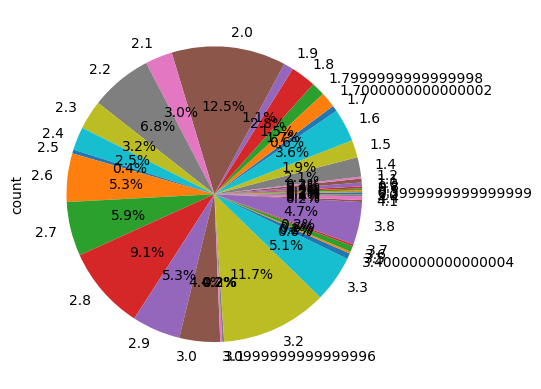

In [12]:
# weights = {
#     'precio_venta_stars': 0.6,        # Precio competitivo es el factor más importante
#     'rentabilidad_10y_stars': 0.2,  # Rentabilidad actual
#     'grow_acu_alquiler_10y_stars': 0.1, # Crecimiento histórico de alquileres
#     'grow_acu_venta_10y_stars': 0.1     # Crecimiento histórico de ventas
# }


# informe['global_score_stars'] = round((
#      informe['precio_venta_stars'] * weights['precio_venta_stars'] \
#     + informe['rentabilidad_10y_stars'] * weights['rentabilidad_10y_stars'] \
#     + informe['grow_acu_alquiler_10y_stars'] * weights['grow_acu_alquiler_10y_stars'] \
#     + informe['grow_acu_venta_10y_stars'] * weights['grow_acu_venta_10y_stars']),1)

# # Restar 0.5 estrellas si la disponibilidad es "ocupada"
# informe.loc[informe['disponibilidad'] == 'ocupada', 'global_score_stars'] = informe['global_score_stars'] - 1

informe['global_score_stars'] = informe.apply(lambda row: RealtyReport.get_global_score_stars(row['precio_venta_stars'], row['rentabilidad_10y_stars'], row['grow_acu_venta_10y_stars'], row['grow_acu_alquiler_10y_stars'], row['disponibilidad']), axis=1)


informe['global_score_stars'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.show()


| Column                          | Dtype     | Descripción                                        |
|---------------------------------|-----------|---------------------------------------------------|
| link                            | object    | Enlace a la publicación del inmueble             |
| type_v                          | object    | Tipo de vivienda (casa, apartamento, etc.)       |
| address                         | object    | Dirección completa del inmueble                  |
| town                            | object    | Ciudad o localidad donde se encuentra el inmueble|
| price                           | int64     | Precio actual del inmueble                       |
| price_old                       | float64   | Precio anterior registrado                       |
| info                            | object    | Información adicional sobre el inmueble          |
| description                     | object    | Descripción del inmueble                         |
| tags                            | object    | Etiquetas asociadas al inmueble                  |
| agent                           | object    | Información sobre el agente inmobiliario         |
| created                         | object    | Fecha de creación del registro                   |
| rooms                           | Int64     | Número de habitaciones                           |
| surface                          | Int64     | Superficie en metros cuadrados                   |
| disponibilidad                  | object    | Estado de disponibilidad del inmueble            |
| barrio                          | object    | Barrio donde se encuentra el inmueble            |
| barrio_ratio                    | float64   | Ratio de certeza de la identificación del barrio |
| id                              | int64     | Identificador único del barrio                   |
| nombre                          | object    | Nombre del barrio                                |
| sup_id                          | int64     | Identificador de la localidad del barrio         |
| sup_nombre                      | object    | Nombre de la localidad del barrio                 |
| tipo                            | object    | Clasificación del tipo de localidad              |
| precio_venta_10y                | float64   | Precio promedio de venta en los últimos 10 años en el barrio |
| superficie_venta_10y            | float64   | Superficie promedio vendida en los últimos 10 años en el barrio |
| elasticidad_10y                 | float64   | Elasticidad del mercado en 10 años en el barrio              |
| precio_venta_1y                 | float64   | Precio promedio de venta en el último año en el barrio         |
| superficie_venta_1y             | float64   | Superficie promedio vendida en el último año en el barrio     |
| elasticidad_1y                  | float64   | Elasticidad del mercado en el último año en el barrio         |
| precio_venta_5y                 | float64   | Precio promedio de venta en los últimos 5 años en el barrio   |
| superficie_venta_5y             | float64   | Superficie promedio vendida en los últimos 5 años en el barrio |
| elasticidad_5y                  | float64   | Elasticidad del mercado en 5 años en el barrio               |
| precio_alquiler_10y             | float64   | Precio promedio de alquiler en los últimos 10 años en el barrio |
| rentabilidad_10y                | float64   | Rentabilidad promedio en los últimos 10 años en el barrio     |
| precio_alquiler_1y              | float64   | Precio promedio de alquiler en el último año en el barrio     |
| rentabilidad_1y                 | float64   | Rentabilidad promedio en el último año en el barrio               |
| precio_alquiler_5y              | float64   | Precio promedio de alquiler en los últimos 5 años en el barrio   |
| rentabilidad_5y                 | float64   | Rentabilidad promedio en los últimos 5 años en el barrio      |
| grow_acu_alquiler_10y           | float64   | Crecimiento acumulado del alquiler en 10 años en el barrio    |
| grow_acu_venta_10y              | float64   | Crecimiento acumulado de ventas en 10 años en el barrio       |  
| grow_acu_superficie_venta_10y   | float64   | Crecimiento acumulado de superficie vendida en 10 años en el barrio |
| grow_acu_alquiler_1y            | float64   | Crecimiento acumulado del alquiler en el último año en el barrio |
| grow_acu_venta_1y               | float64   | Crecimiento acumulado de ventas en el último año en el barrio |
| grow_acu_superficie_venta_1y    | float64   | Crecimiento acumulado de superficie vendida en el último año en el barrio |
| grow_acu_alquiler_5y            | float64   | Crecimiento acumulado del alquiler en los últimos 5 años en el barrio |
| grow_acu_venta_5y               | float64   | Crecimiento acumulado de ventas en los últimos 5 años en el barrio |
| grow_acu_superficie_venta_5y    | float64   | Crecimiento acumulado de superficie vendida en los últimos 5 años en el barrio |
| elasticidad_10y_stars           | int64     | Puntuación de elasticidad del mercado en 10 años en el barrio |
| rentabilidad_10y_stars          | int64     | Puntuación de rentabilidad en 10 años en el barrio |
| grow_acu_alquiler_10y_stars     | int64     | Puntuación de crecimiento de alquiler en 10 años en el barrio |
| grow_acu_venta_10y_stars        | int64     | Puntuación de crecimiento de ventas en 10 años en el barrio |
| precio_m2                       | int64     | Precio por metro cuadrado del inmueble                    |
| precio_desv_media               | float64   | Desviación del precio respecto a la media en el barrio   |
| precio_venta_stars              | int64     | Puntuación del precio de venta del inmueble            |
| precio_alquiler_estimado        | Float64   | Precio estimado de alquiler del inmueble               |
| precio_venta_estimado           | Float64   | Precio estimado de venta del inmueble                |
| global_score_stars               | Float64   | Puntuación global del inmueble                        |


In [13]:
print(informe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created                        472 non-null    object 
 1   link                           472 non-null    object 
 2   type_v                         472 non-null    object 
 3   address                        472 non-null    object 
 4   town                           472 non-null    object 
 5   price                          472 non-null    int64  
 6   rooms                          417 non-null    float64
 7   surface                        470 non-null    float64
 8   price_old                      22 non-null     float64
 9   info                           472 non-null    object 
 10  description                    472 non-null    object 
 11  tags                           472 non-null    object 
 12  agent                          177 non-null    obj

In [14]:
from IPython.display import HTML


columns = ['link', 'type_v', 'address', 'town', 'price', 'price_old', 'info',
       'description', 'tags', 'agent', 'created', 'rooms', 'surface',
       'disponibilidad', 'barrio', 'barrio_ratio', 'id', 'nombre', 'sup_id',
       'sup_nombre', 'tipo', 'precio_venta_10y', 'superficie_venta_10y',
       'elasticidad_10y', 'precio_venta_1y', 'superficie_venta_1y',
       'elasticidad_1y', 'precio_venta_5y', 'superficie_venta_5y',
       'elasticidad_5y', 'precio_alquiler_1y', 'rentabilidad_1y',
       'precio_alquiler_5y', 'rentabilidad_5y', 'precio_alquiler_10y',
       'rentabilidad_10y', 'grow_acu_alquiler_1y', 'grow_acu_venta_1y',
       'grow_acu_superficie_venta_1y', 'grow_acu_alquiler_5y',
       'grow_acu_venta_5y', 'grow_acu_superficie_venta_5y',
       'grow_acu_alquiler_10y', 'grow_acu_venta_10y',
       'grow_acu_superficie_venta_10y', 'elasticidad_10y_stars',
       'rentabilidad_10y_stars', 'grow_acu_alquiler_10y_stars',
       'grow_acu_venta_10y_stars', 'precio_m2', 'precio_desv_media',
       'precio_venta_stars', 'precio_alquiler_estimado',
       'precio_venta_estimado', 'global_score_stars']

informe[columns].to_csv('datasets/gen_informe.csv', index=False)


for _, row in informe[informe['global_score_stars'] > 3].sort_values(by='global_score_stars', ascending=False).iterrows():
   
#    display(row.to_dict())
   display(HTML(f"""<h3>{row['type_v']} en <a href="{row['link']}">{row['address']}</a></h3>
                <b>Estrellas Globales</b>: {row['global_score_stars']}<br>
                <b>Estrellas de Precio</b>: {row['precio_venta_stars']}<br>
                <b>Estrellas de Rentabilidad</b>: {row['rentabilidad_10y_stars']}<br>
                <b>Rentabilidad</b>: {row['rentabilidad_10y'] *100:.2f} %<br>
                <b>precio</b>: {row['price']} €<br>
                <b>metros cuadrados</b>: {row['surface']} m2<br>
                <b>precio_m2</b>: {row['precio_m2']} €/m2 ({row['precio_venta_stars']} estrellas) ya que es un {row['precio_desv_media']*100:.0f}% del precio medio de venta de {row['nombre']} : {row['precio_venta_1y']:.0f} €/m2<br>
                <b>precio_alquiler_estimado</b>: {row['precio_alquiler_estimado']:.0f} €/mes<br>
                <b>precio_venta_estimado</b>: {row['precio_venta_estimado']:.0f} €<br>
                <b>habitaciones</b>: {row['rooms']}<br>
                <b>descripcion</b>: {row['description']}<br>
                <b>tags</b>: {row['tags']}<br>
                <b>barrio</b>: {row['barrio']}<br>
                <b>creado</b>: {row['created']}<br>
                <b>disponibilidad</b>: {row['disponibilidad']}<br>
                """))
